In [1]:
# neural network
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as  plt
from glob import glob

In [2]:
train_path="Training/"
test_path="Test/"

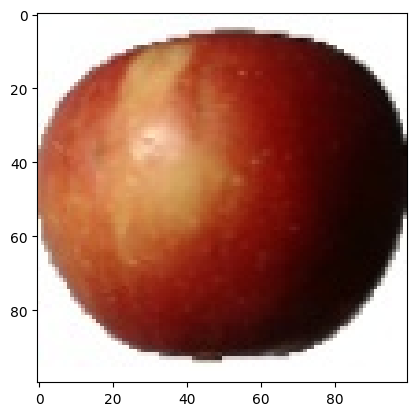

In [3]:
img=keras.preprocessing.image.load_img(train_path+"Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.show()

In [4]:
x= keras.preprocessing.image.img_to_array(img)
print(x.shape)

(100, 100, 3)


In [5]:
className=glob(train_path+'/*')

numberOfClass=len(className)
print("Number of classes: ",numberOfClass)

Number of classes:  131


# CNN Model

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) ## output
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

batch_size=32



In [31]:
x.shape

(100, 100, 3)

# İmage Data Generator

In [32]:
## Data generation Train-Test
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,shear_range=0.3)

test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [33]:
train_generator= train_datagen.flow_from_directory(train_path,target_size=x.shape[:2],batch_size=batch_size,color_mode="rgb",class_mode="categorical")

Found 67692 images belonging to 131 classes.


In [34]:
test_generator= test_datagen.flow_from_directory(train_path,target_size=x.shape[:2],batch_size=batch_size,color_mode="rgb",class_mode="categorical")

Found 67692 images belonging to 131 classes.


In [41]:
hist=model.fit(train_generator,steps_per_epoch=1600//batch_size,epochs=2,validation_data=test_generator,validation_steps=800//batch_size)

Epoch 1/2
50/50 [==============================] - 9s 184ms/step - loss: 0.8088 - accuracy: 0.7544 - val_loss: 0.3923 - val_accuracy: 0.8988
Epoch 2/2
50/50 [==============================] - 8s 159ms/step - loss: 0.7386 - accuracy: 0.7844 - val_loss: 0.3707 - val_accuracy: 0.9038


In [42]:
##model save

model.save_weights("deneme.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


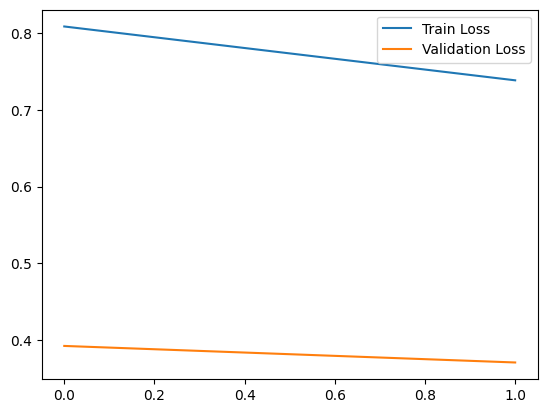

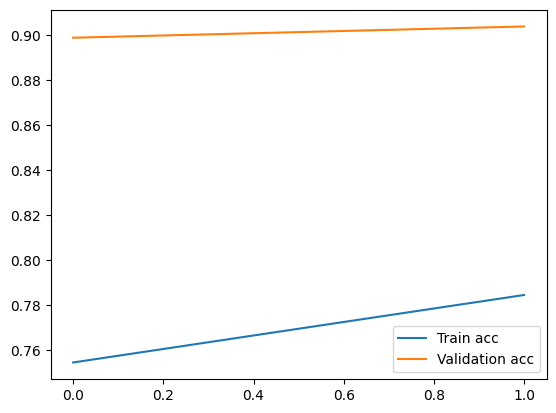

In [43]:
#model evaluation

print(hist.history.keys())
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label="Train acc")
plt.plot(hist.history["val_accuracy"],label="Validation acc")
plt.legend()
plt.show()


In [44]:
## save history
import json 
with open("deneme.json","w") as f:
    json.dump(hist.history,f)


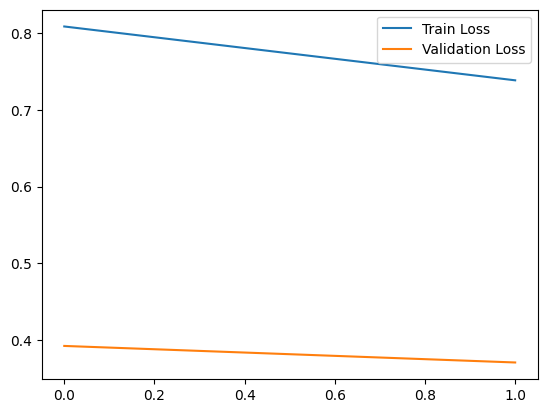

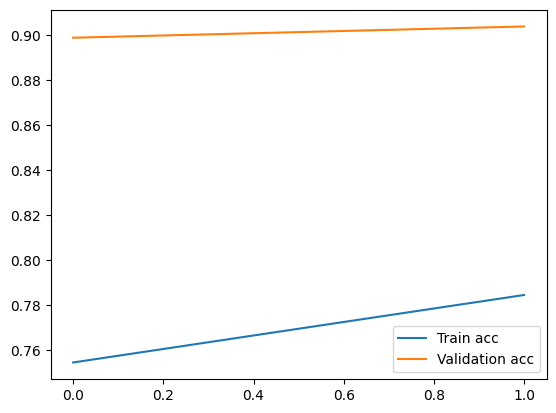

In [45]:
#load history
import codecs 
with codecs.open("deneme.json","r",encoding="utf-8") as f:
    h=json.loads(f.read())



plt.plot(h["loss"],label="Train Loss")
plt.plot(h["val_loss"],label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label="Train acc")
plt.plot(h["val_accuracy"],label="Validation acc")
plt.legend()
plt.show()
